## Analysis of a drugstore chain sales


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
df = pd.read_csv('think capstone1_slim.csv' ,encoding ='latin1')
# initially I got this error and had to use 'encoding': " 'utf-8' codec can't decode byte  in position : invalid start byte"

The data is extracted from a db with a few million rows. 
The data was aggregated on the 'Total_Sales', 'Units_Sold' and 'Net_Profit' by IdLocation and calendar months('YYYY-MM').
I extracted only the products that met the top 10 criteria on either 'Total_Sales' or 'Net_Profit' for each classification and for each of the 5 locations.

In [134]:
df.head()

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3
1,2015-1,2130,Panthen Unguent 50 Mg /G X 100 G,BAYER SCHERING,Cosmetice,3,Stad,265.55,4,0,5.0,46.66,1,1
2,2015-1,18,Oderma Abc Derm Gel Spumant X 200 Ml,BIODERMA,Cosmetice,3,Stad,37.42,1,0,1.0,9.45,14,9
3,2015-1,20697,Ltene Tratament Pt Unghii,FOLTENE,Cosmetice,3,Stad,48.90,1,0,1.0,4.38,8,33
4,2015-1,25030,Nsiprod Tensiometru Pentru Brat,PANSIPROD,Dispozitive Medicale,3,Stad,408.16,2,0,2.0,96.13,1,2


In [40]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['IdLocation'], return_counts=True)
print(values,counts)

[   3    4   18 1001 1002] [318 320 360 359 329]


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
YYYY_MM                        1686 non-null object
IdProduct                      1686 non-null int64
Product_Name                   1686 non-null object
Manufacturer_Name              1686 non-null object
Product Classification         1686 non-null object
IdLocation                     1686 non-null int64
Drugstore_Name                 1686 non-null object
Total_Sales                    1686 non-null float64
No_of_transactions             1686 non-null int64
No_of_medical_prescriptions    1686 non-null int64
Units_Sold                     1686 non-null float64
Net_Profit                     1686 non-null float64
row_num_sales                  1686 non-null int64
row_num_profit                 1686 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 184.5+ KB
None


In [7]:
df.describe()

,IdProduct,IdLocation,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,17536.994662,413.838078,755.249087,45.064650,5.153025,94.325463,177.627141,8.174377,17.077106
std,10105.808406,488.085122,1324.470312,186.227578,20.279157,671.290253,293.222479,7.835199,52.260305
min,13.000000,3.000000,0.080000,0.000000,0.000000,0.100000,-407.790000,1.000000,1.000000
25%,8709.000000,4.000000,95.887500,3.000000,0.000000,3.000000,18.240000,3.000000,3.000000
50%,20178.000000,18.000000,278.640000,11.000000,0.000000,11.000000,65.215000,6.500000,6.500000
75%,25873.750000,1001.000000,808.340000,33.000000,0.000000,40.000000,224.167500,10.000000,10.000000
max,31609.000000,1002.000000,20388.060000,3346.000000,196.000000,15500.000000,2614.640000,69.000000,845.000000


In [8]:
# What kind of data is in the column:
df.IdProduct.value_counts()

13427    15
25702    15
2391     15
22943    15
3776     15
25169    15
26181    15
2380     15
25705    15
2377     15
20180    15
63       15
2386     15
20177    15
11812    15
20178    15
2372     15
3226     15
2387     15
2370     15
22828    15
12565    15
12573    14
10429    14
22522    14
2130     14
25704    14
25703    14
5041     14
16959    14
         ..
31298     1
5934      1
26983     1
14971     1
29296     1
12909     1
12904     1
31334     1
31333     1
10839     1
29088     1
27868     1
1542      1
14917     1
15546     1
27964     1
14908     1
15629     1
23822     1
15635     1
9499      1
31281     1
31277     1
1316      1
31273     1
18982     1
29216     1
27948     1
2568      1
16384     1
Name: IdProduct, dtype: int64

In [26]:
df['Product Classification'].plot.hist()
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [10]:
df['Product Classification'].value_counts()

RX                            211
Suplimente                    207
OTC                           205
Cosmetice                     204
Parafarm.                     200
Dispozitive Medicale          190
_DispozitivMedicalMultiplu    158
PROPRII                       158
Homeopate                      79
0 Consumabile                  58
RX - 120                       15
0 Obiecte de inventar           1
Name: Product Classification, dtype: int64

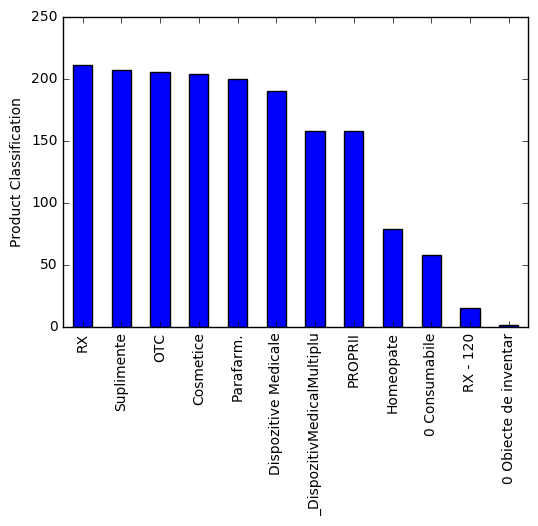

In [31]:
df['Product Classification'].value_counts().plot( kind='bar' )
plt.ylabel('Product Classification')
plt.show()

# Shows how many occurances has each classification. The initial purpose was to see if there is a Classification that stands out?

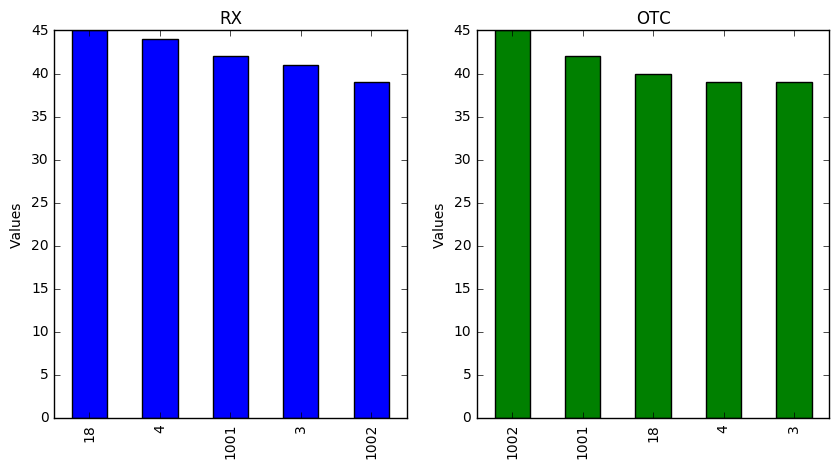

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['IdLocation'][df['Product Classification'] =='RX'].value_counts().plot( kind='bar' , color='blue' ) 
plt.ylabel('Values')
plt.title('RX')

plt.subplot(1, 2, 2)
df['IdLocation'][df['Product Classification'] =='OTC'].value_counts().plot( kind='bar' , color='green' ) 
plt.ylabel('Values')
plt.title('OTC')
plt.show()

In [15]:
print (df.groupby('Product Classification').groups)

{'RX - 120': [40, 103, 333, 373, 587, 621, 786, 824, 999, 1015, 1147, 1229, 1503, 1615, 1665], 'PROPRII': [11, 12, 36, 51, 52, 60, 61, 74, 88, 100, 114, 128, 140, 152, 153, 166, 167, 180, 192, 203, 212, 226, 252, 275, 276, 307, 319, 330, 345, 355, 371, 382, 383, 395, 396, 405, 406, 419, 433, 448, 455, 470, 471, 481, 494, 506, 508, 509, 522, 533, 547, 561, 567, 583, 584, 599, 600, 612, 618, 619, 632, 648, 649, 661, 668, 669, 681, 708, 709, 729, 745, 758, 771, 781, 782, 798, 810, 820, 831, 844, 861, 862, 878, 886, 887, 901, 902, 914, 926, 927, 949, 974, 988, 997, 1012, 1026, 1040, 1041, 1050, 1063, 1064, 1081, 1096, 1105, 1117, 1118, 1129, 1143, 1144, 1158, 1159, 1174, 1175, 1179, 1180, 1193, 1203, 1204, 1215, 1227, 1240, 1253, 1268, 1280, 1293, 1309, 1310, 1323, 1337, 1342, 1359, 1377, 1403, 1432, 1457, 1469, 1483, 1497, 1500, 1515, 1516, 1541, 1542, 1564, 1579, 1581, 1591, 1607, 1608, 1612, 1628, 1642, 1643, 1650, 1661, 1662, 1670, 1682], '_DispozitivMedicalMultiplu': [0, 17, 18, 27, 2

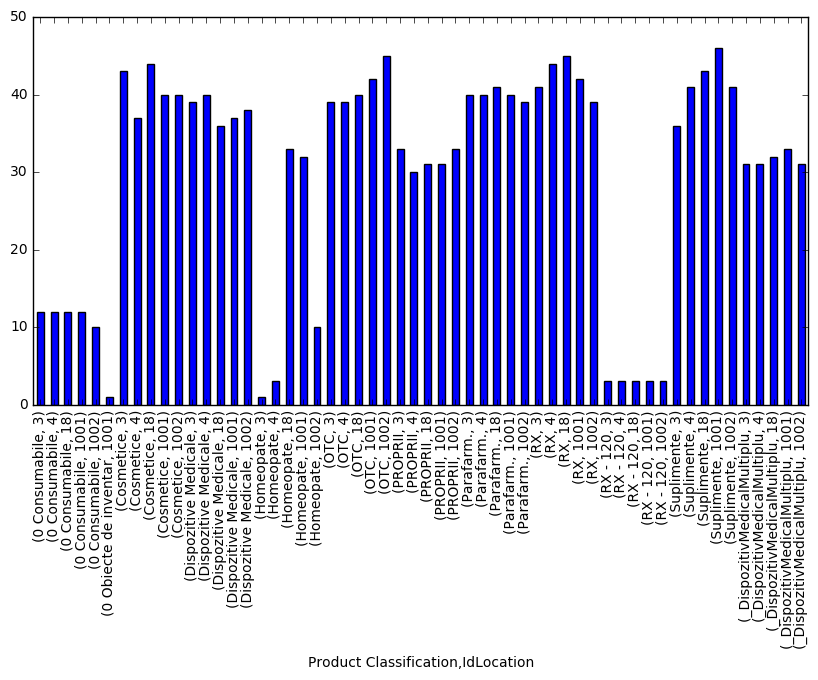

In [18]:
groups = df.groupby(['Product Classification','IdLocation']).size()
groups.plot( kind = 'bar' , figsize = (10,5) )

In [41]:
pd.crosstab(df['Product Classification'],df['IdLocation'])

IdLocation,3,4,18,1001,1002
Product Classification,,,,,
0 Consumabile,12,12,12,12,10
0 Obiecte de inventar,0,0,0,1,0
Cosmetice,43,37,44,40,40
Dispozitive Medicale,39,40,36,37,38
Homeopate,1,3,33,32,10
OTC,39,39,40,42,45
PROPRII,33,30,31,31,33
Parafarm.,40,40,41,40,39
RX,41,44,45,42,39


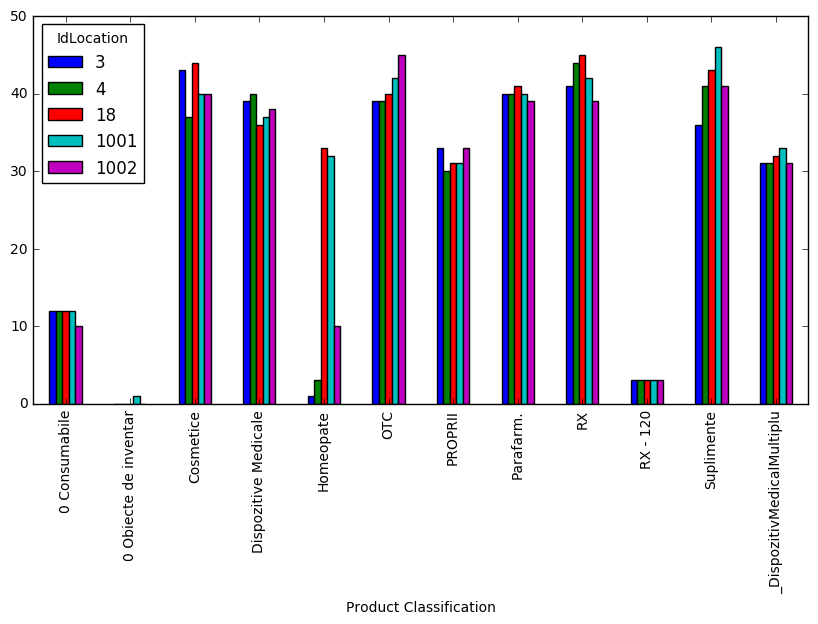

In [13]:
pd.crosstab(df['Product Classification'],df['IdLocation']).plot( kind = 'bar' , figsize = (10,5) )

In [42]:
df.head(1)

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3


In [60]:
#df.groupby('Product Classification').aggregate(np.sum)
#or pandas:
df.groupby('Product Classification').sum()

,IdProduct,IdLocation,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
Product Classification,,,,,,,,,
0 Consumabile,1490803,22332,8499.23,33573,0,110272.00,1375.05,143,143
0 Obiecte de inventar,42,1001,0.30,1,0,30.00,-2.75,1,1
Cosmetice,3811691,81189,22909.08,551,0,580.00,3195.96,1964,3550
Dispozitive Medicale,5092506,76038,56576.59,1330,44,976.07,10973.16,1403,1658
Homeopate,2048340,42661,1478.58,93,0,102.00,504.48,438,439
OTC,3014252,88125,205599.16,16495,0,12135.28,55431.14,2121,4055
PROPRII,787242,64874,100480.37,3614,0,2725.78,52567.66,915,921
Parafarm.,2790664,80136,75215.78,3123,88,5084.31,9957.36,1769,7306
RX,2965973,82229,675328.83,10760,8556,15225.08,129235.93,2137,5444


In [258]:
df.groupby(['Product Classification','IdLocation'])['Total_Sales','Net_Profit'].sum()

Total_Sales  Net_Profit
Product Classification     IdLocation                         
0 Consumabile              3               1038.11        0.31
                           4               1246.61       86.07
                           18               451.00      127.91
                           1001            1665.63      295.57
                           1002            4097.88      865.19
0 Obiecte de inventar      1001               0.30       -2.75
Cosmetice                  3               2960.54      428.19
                           4               4781.80     1031.06
                           18              4464.55       99.34
                           1001            4966.90      746.13
                           1002            5735.29      891.24
Dispozitive Medicale       3               7230.68     1198.36
                           4              12319.29     2923.76
                           18              8269.83     1774.17
                           1001           15365.21     2814.75
                           1002           13391.58     2262.12
Homeopate                  3                 40.60       10.74
                           4                121.80       33.56
                           18               561.90      210.97
                           1001             487.53      166.71
                           1002             266.75       82.50
OTC                        3              28282.41     7429.26
                           4              52656.50    15953.49
                           18             30970.52     8707.65
                           1001           45451.82    12222.53
                           1002           48237.91    11118.21
PROPRII                    3              11807.12     4714.62
                           4              18027.06     9924.05
                           18             28189.53    14715.89
                           1001           15670.63     8438.29
                           1002           26786.03    14774.81
Parafarm.                  3              11564.41     1475.13
                           4              17620.27     2359.21
                           18             11744.12     1002.63
                           1001           19242.12     2678.65
                           1002           15044.86     2441.74
RX                         3              89050.55    16113.68
                           4             106525.34    19032.66
                           18            132852.69    23388.71
                           1001          177528.62    27406.69
                           1002          169371.63    43294.19
RX - 120                   3                 22.47        4.45
                           4                 73.83       14.66
                           18               118.77       23.57
                           1001             186.21       30.29
                           1002              57.78       11.49
Suplimente                 3              16230.85     4055.24
                           4              30184.81     8433.06
                           18             19146.05     5334.20
                           1001           26713.83     8018.86
                           1002           29348.09     8001.10
_DispozitivMedicalMultiplu 3                537.17      226.42
                           4               1178.39      556.09
                           18               734.75      308.33
                           1001            1380.58      615.82
                           1002            1348.46      607.79

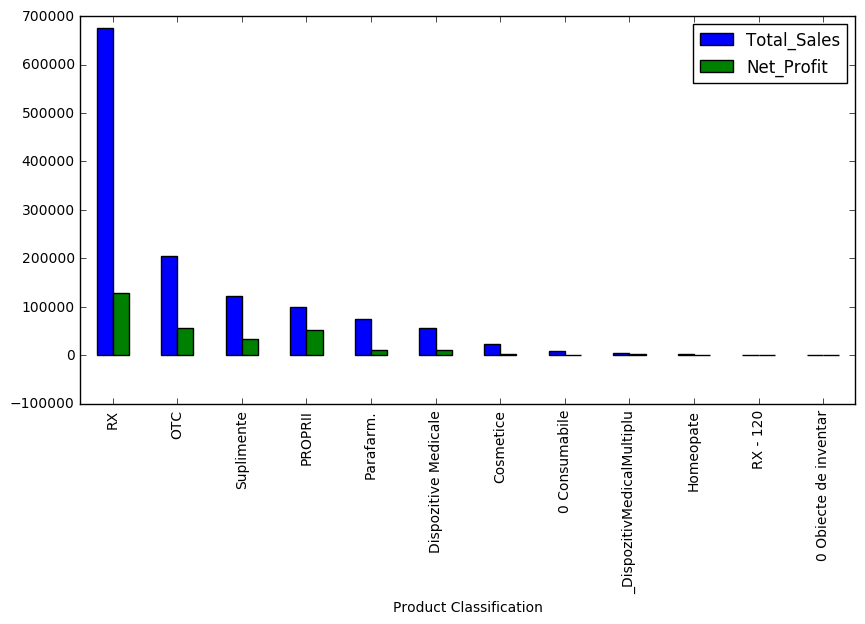

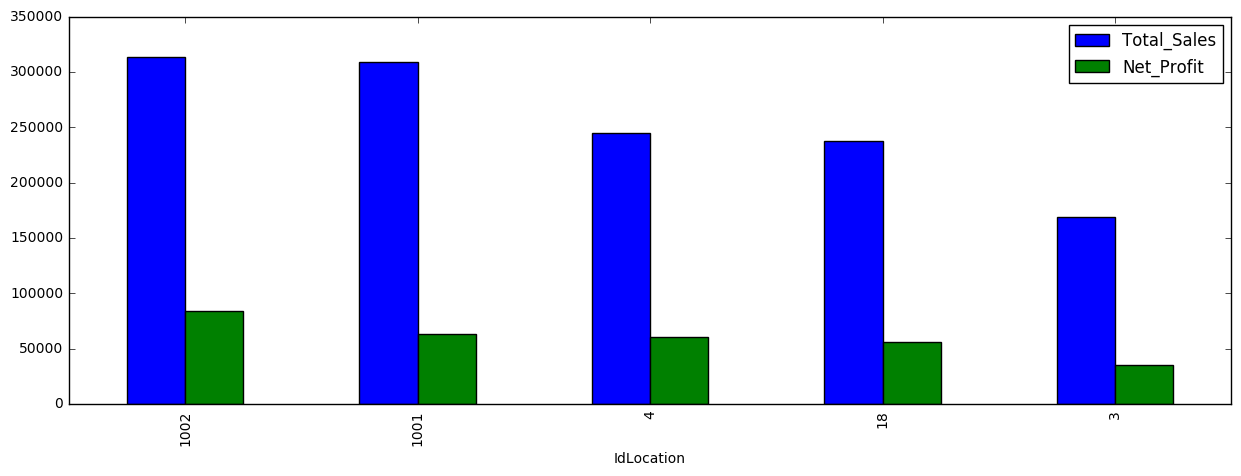

In [267]:
#pd.crosstab(df['Product Classification'],df['IdLocation']).plot( kind = 'bar' , figsize = (10,5) )

b = df.groupby(['Product Classification'],sort = False)['Total_Sales','Net_Profit'].sum()
b.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (10,5))

c=df.groupby(['IdLocation'])['Total_Sales','Net_Profit'].sum()
c.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (15,5))
plt.show()

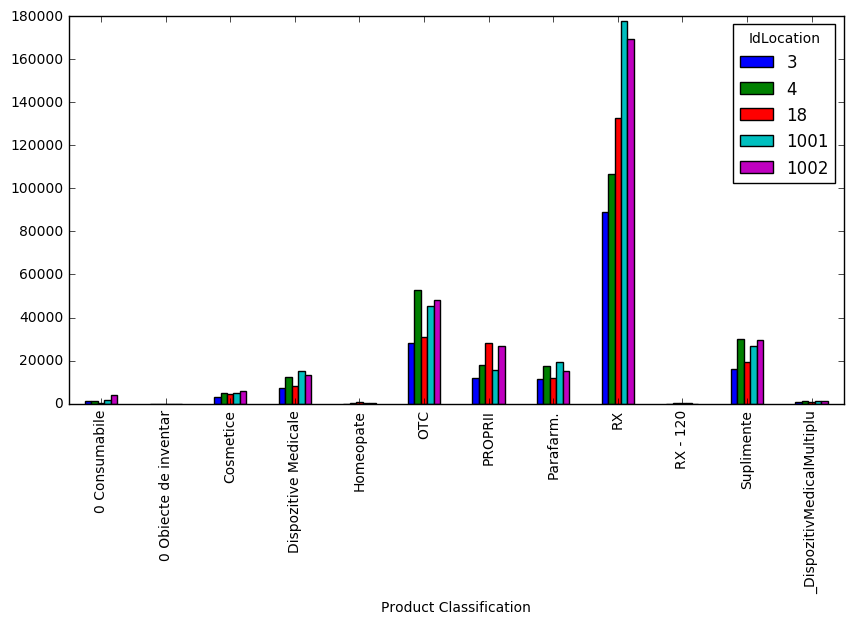

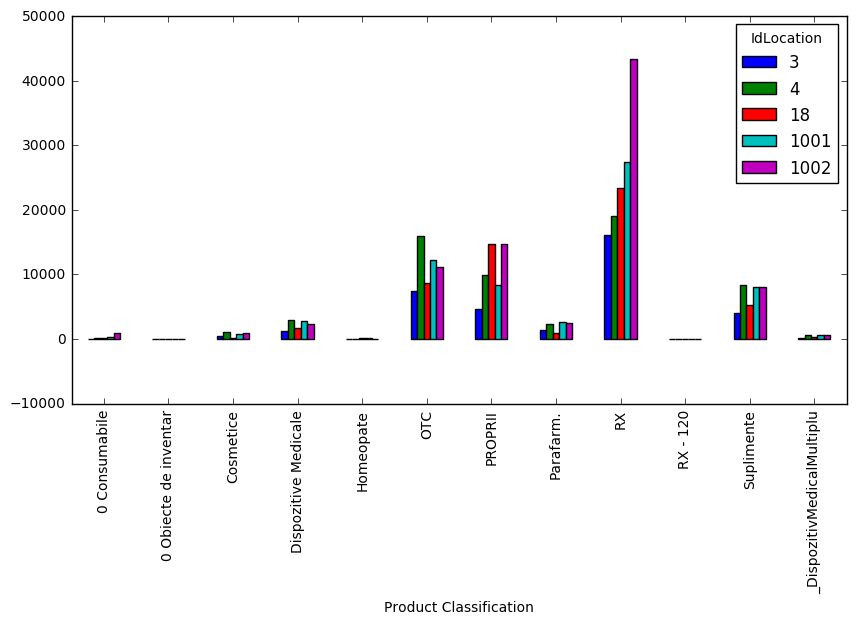

In [212]:
# a = df.groupby(['Product Classification','IdLocation'])['Total_Sales','Net_Profit'].sum()

plt.figure()
df.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum().unstack().plot(kind='bar',subplots=False , figsize=(10,5))
df.groupby(['Product Classification','IdLocation'])['Net_Profit'].sum().unstack().plot(kind='bar',subplots=False , figsize=(10,5))

plt.show()

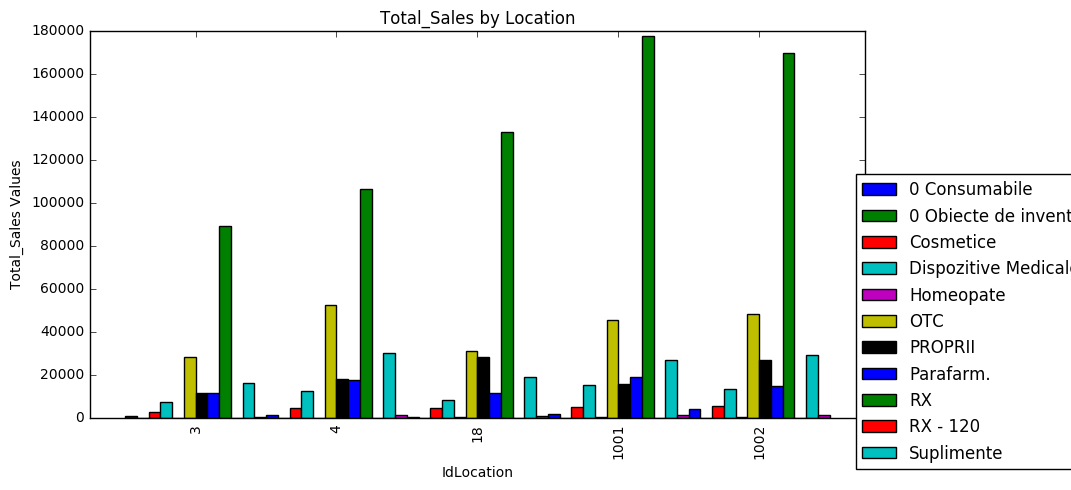

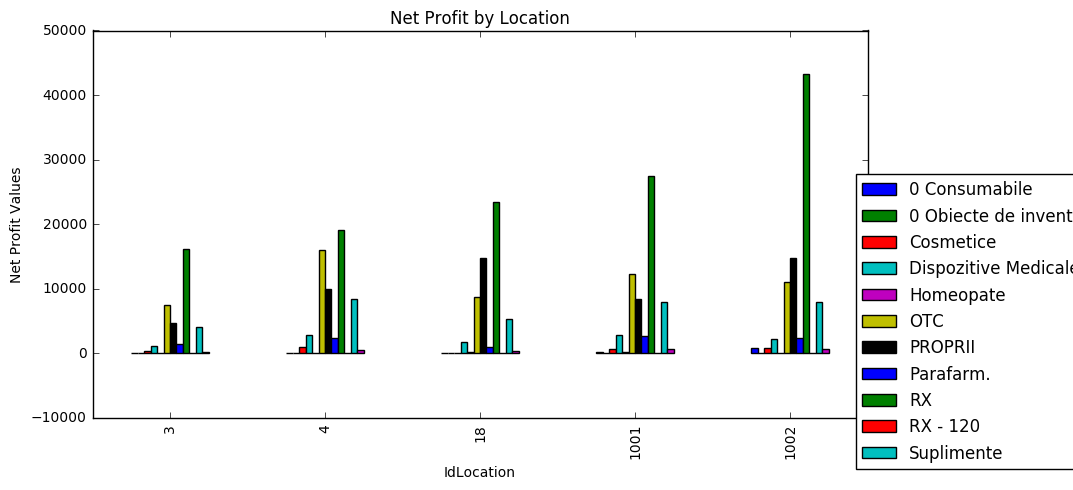

In [289]:
#plt.figure(figsize=(10, 5))

#plt.subplot(1, 2, 1)
a1 = df.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum().unstack('Product Classification').plot(kind='bar',subplots=False , figsize=(10,5) , width=1)


plt.ylabel('Total_Sales Values')
plt.title('Total_Sales by Location')
leg = plt.legend( loc = 'upper right')
plt.draw() # Draw the figure so you can find the positon of the legend. 
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


df.groupby(['Product Classification','IdLocation'])['Net_Profit'].sum().unstack('Product Classification').plot(kind='bar',subplots=False , figsize=(10,5))
plt.ylabel('Net Profit Values')
plt.title('Net Profit by Location')
leg = plt.legend( loc = 'upper right')
plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 39 to 54
Data columns (total 3 columns):
Product Classification    56 non-null object
IdLocation                56 non-null int64
Total_Sales               56 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


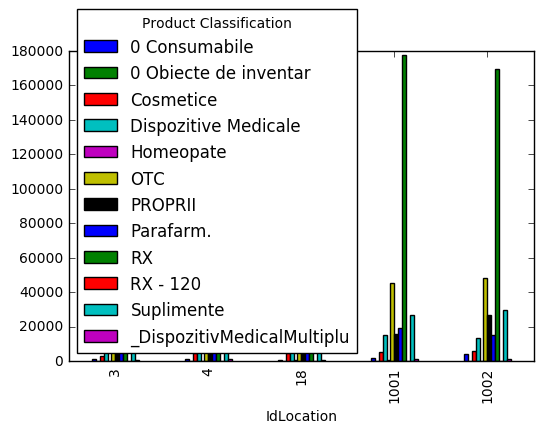

In [231]:
# .unstack('Product Classification').plot(kind='bar',subplots=False , figsize=(10,5) , width=1)
a1 = df.groupby(['Product Classification','IdLocation'],sort=False)['Total_Sales'].sum().reset_index()
a1 = a1.sort_values( by = ['Total_Sales','Product Classification'  ] , ascending = [False,False] )
a1.info()# = a1.to_frame()#.unstack('IdLocation')
#a1.describe()
a1.groupby(['Product Classification','IdLocation'])['Total_Sales'].sum().unstack('Product Classification').plot(kind='bar')

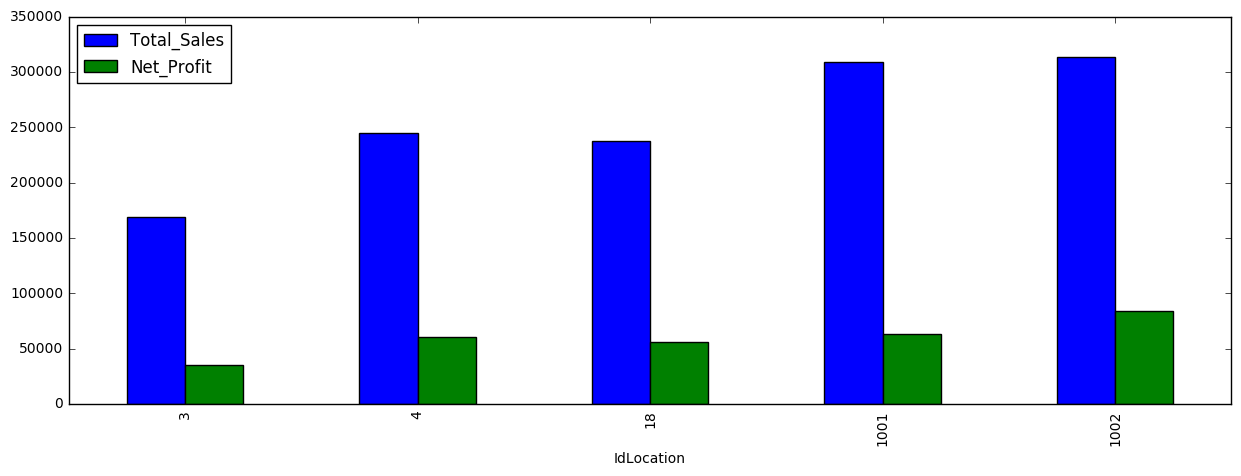

In [116]:
#GroupBy C2
grouped = df.groupby('IdLocation')
grouped['Total_Sales','Net_Profit'].sum().plot( kind = 'bar' ,figsize = (15,5))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=18.0, right=18.0
  'left=%s, right=%s') % (left, right))
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1001.0, right=1001.0
  'left=%s, right=%s') % (left, right))
C:\Anaconda3\lib\site-packages\matplotlib\ax

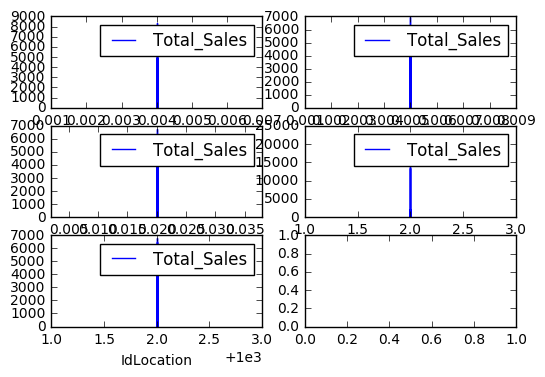

In [118]:
import math
#Also accounts for odd number of plots
nrows = int(math.ceil(len(grouped)/2.))

#Setup Subplots
fig, axs = plt.subplots(nrows,2)
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(x='IdLocation',y='Total_Sales', ax=ax)

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['IdLocation'][df['Product Classification'] =='RX'].value_counts().plot( kind='bar' , color='blue' ) 
plt.ylabel('Values')
plt.title('RX')

plt.subplot(1, 2, 2)
df['IdLocation'][df['Product Classification'] =='OTC'].value_counts().plot( kind='bar' , color='green' ) 
plt.ylabel('Values')
plt.title('OTC')
plt.show()